In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [2]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Hp/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
print('number of all positive tweets: ', len(all_positive_tweets))
print('number of all negative tweets: ', len(all_negative_tweets))

number of all positive tweets:  5000
number of all negative tweets:  5000


In [25]:
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))
print(all_positive_tweets[0])


The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


### Create pie chart

([<matplotlib.patches.Wedge at 0x24cda235250>,
 [Text(6.735557395310444e-17, 1.1, 'Positives'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative')])

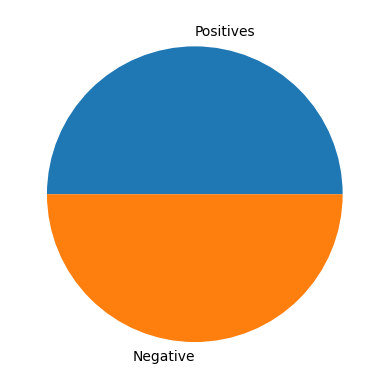

In [8]:
labels= ['Positives', 'Negative']
values= [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(values, labels=labels)

## Preprocess raw text for Sentiment analysis

In [9]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks, Twitter marks and styles

In [13]:
print('\033[92m' + tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [15]:
# remove old style retweet text "RT"
# re is used to remove. Sub is used to substitute it with soemthing else like empty string in this case


tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

In [16]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

In [17]:
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

In [18]:
tweet_tokens

['my',
 'beautiful',
 'sunflowers',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'off',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off',
 '…']

### Remove stop words and punctuations

In [19]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

In [20]:
print(stopwords_english)
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Clean the tokenized tweet

In [21]:
tweets_clean = []
for word in tweet_tokens:
    if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


###  Stemming

In [22]:
# Instantiate stemming class
stemmer = PorterStemmer() 

In [23]:
# Create an empty list to store the stems
tweets_stem = [] 
for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

In [24]:
print('stemmed words:')
print(tweets_stem)

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
